In [2]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from sentence_transformers import SentenceTransformer

/home/rctejon/Documents/tesis/Multimodal-RecSys/venv38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Redes neuronales basdas en grafos

# Entities Exploration

## Concept

In [5]:
concept_df = pd.read_json("../data/MOOCCube/entities/concept.json",lines=True)
conceptx_df = pd.read_json("../data/MOOCCubeX/entities/concept.json",lines=True)

In [6]:
concept_df.shape

(114563, 4)

In [7]:
conceptx_df.shape

(637572, 3)

In [8]:
concept_df.sample(5)

,id,name,en,explanation
12361,K_伞形花内酯_化学,伞形花内酯,umbelliferone,学科：化学_有机化学_有机化合物_天然产物类名词 定义：C-7位上接有羟基的一类香豆素衍生物...
84271,K_加速间隙_电气工程,加速间隙,accelerating gap,学科：电气工程_工业加速器 见载：《电气工程名词》第一版
25416,K_动脉贮血室_医学,动脉贮血室,arterial reservoir,学科：医学_胸心血管外科学 见载：《医学名词 第六分册》第一版
20663,K_电弧烧伤_医学,电弧烧伤,electric arc burn,学科：医学_整形外科学 见载：《医学名词 第七分册》第一版
44774,K_庞加莱对偶_数学,庞加莱对偶,Poincare&1& duality,学科：数学_几何学 _拓扑学 _代数拓扑学 见载：《数学名词》第一版


In [9]:
conceptx_df.sample(5)

,id,name,context
133387,K_方向性函数_地球物理学,方向性函数,[]
371484,K_延髓静脉_人体解剖学,延髓静脉,[]
546510,K_密度减小_水利工程,密度减小,[]
109892,K_脱氨作用_生物化学与分子生物学,脱氨作用,[]
174817,K_肾动脉_人体解剖学,肾动脉,[量血压时听诊部门在肱二头肌腱内侧\n20.腹主动脉直接发自的脏支：腹腔干，肠系膜下动脉，肠...


## Course

In [10]:
course_df = pd.read_json("../data/MOOCCube/entities/course.json",lines=True)
coursex_df = pd.read_json("../data/MOOCCubeX/entities/course.json",lines=True)

In [11]:
course_df.shape

(706, 8)

In [12]:
coursex_df.shape

(3781, 6)

In [13]:
course_df.sample(5)

,id,name,prerequisites,about,core_id,video_order,display_name,chapter
622,C_course-v1:TsinghuaX+20190222+2019_T1,病理学,在学习本课程之前，需要先学习什么课程。,<p>\n\t<br />\n</p>\n<p>\n\t是主要从形态学角度探究疾病的医学基础...,C_course-v1:TsinghuaX+20190222+2019_T1,"[V_44ac4676992649338488d7bce8e00c66, V_a3f7ee1...","[Video, Video, Video, Video, Video, Video, Vid...","[01.01.01.01, 02.01.01.01, 02.02.01.01, 02.03...."
649,C_course-v1:BSU+2018122403X+2019_T1,女性修与养：女性运动、营养与健康（2019春）,只要关注运动健康和营养的知识即可，无特殊先修知识要求,进入21世纪，女性的社会地位发生了巨大的改变。她们不仅站上了国际舞台，用身体表达着女性的力量...,C_course-v1:BSU+2018122403X+2019_T1,"[V_7c307b86c42a4490b9b6f238c3a77858, V_af7813b...","[Video, Video, Video, Video, Video, Video, Vid...","[01.01.01.01, 01.02.01.01, 01.03.01.01, 02.01...."
148,C_course-v1:WellesleyX+ANTH207x+sp,人类进化导论（自主模式）,无,<p>\r\n\t作为现代人类，我们都是以往进化的结果。可以通过研究人类化石记录、考古研究资...,C_course-v1:WellesleyX+ANTH207x+sp,"[V_50b67cece339439f9de93894e2a64854, V_c460e78...","[Welcome to 207x!, Why a MOOC?, What's an anth...","[01.01.01.01, 01.01.02.01, 01.02.01.01, 01.02...."
170,C_course-v1:TsinghuaX+40260092X+sp,集成传感器(自主模式),无,传感器是能够感受规定的被测量，并按照一定规律转换成可用输出信号的器件或装置。本课程围绕常见传...,C_course-v1:TsinghuaX+40260092X+sp,"[V_1593d5e37f674e468545e69247b6b82f, V_2bf0a29...","[第1节 什么是传感器, 第2节 什么是集成传感器, 第3节 集成传感器的应用, 第4节 硅...","[01.01.01.01, 01.02.01.01, 01.03.01.01, 01.04...."
369,C_course-v1:TsinghuaX+70612463X+2019_T1,基于R语言的社会统计分析（2019春）,本课程要求基本的数学知识。如果学生能够对微积分、线性代数以及概率论与数理统计有所了解，会有助...,<p>\r\n\t统计学是现代科学的通用语，是现代研究一项不可缺少的工具。社会科学与经典统计...,C_course-v1:TsinghuaX+70612463X+sp,"[V_ffd2bda8994141748e107f941019a93d, V_6c9170b...","[视频1.1, 视频 1.2, 视频 1.3, 视频 1.4, Video, Video, ...","[01.01.01.01, 01.02.01.01, 01.03.01.01, 01.04...."


In [14]:
coursex_df.sample(5)

,id,name,field,prerequisites,about,resource
737,C_682433,中国近现代史纲要,"[历史学, 政治学]",,在这里，你能够领略近代以来的风云际会，感悟中华民族不屈不挠的追梦历程；在这里，你能够纵览近代...,"[{'titles': ['一、反对外国侵略的斗争', '1.教学视频', '资本-帝国主义..."
3144,C_1912010,从新冠疫情看人类命运共同体,[],,本课程从纷繁复杂的全球抗疫局势中选取了具有代表性的案例，以生动简明的方式阐述了疫情中关于全球...,"[{'titles': ['从新冠疫情看人类命运共同体（上）', None, '从新冠疫情看..."
2502,C_1765591,Wisdom of Life from Confucius,[],The course is suitable for readers who are int...,Based on The Analects and the results of liter...,[{'titles': ['Introduction to Wisdom of Life f...
1736,C_911162,微观经济学,[],,你注意到这样的现象吗？丰收的农民却减少了收入；亏损的企业仍在开工；犀牛濒临灭绝，黄牛却没有繁...,"[{'titles': ['第一讲 导论', None, '1-01 经济与经济学'], ..."
2925,C_682696,图像处理与分析,[],,《图像处理与分析》意在丰富学生图像处理与分析的知识，培养学生图像处理与分析的学习兴趣、创新思...,"[{'titles': ['绪论', '数字图像处理概述', '数字图像处理的定义'], '..."


In [10]:
def remove_html_and_carriage_returns(text):
    soup = BeautifulSoup(text, "html.parser")
    text_without_html = soup.get_text().replace("\n","").replace("\r","").replace("\t","")
    
    return text_without_html

course_df["about"] = course_df["about"].apply(remove_html_and_carriage_returns)
course_df.sample(5)

,id,name,prerequisites,about,core_id,video_order,display_name,chapter
294,C_course-v1:BNU+CSL21126882+2019_T1,应用语言学理论与实践,具备基本汉语基础知识 和基本语言学知识,《应用语言学理论与实践》这门课在语言学理论知识的基础上，将理论与实践相结合，着重讨论语言教学...,C_course-v1:BNU+CSL21126882+2019_T1,"[V_e5e2e6f7f9ff49e3989a20574ca83325, V_37889f4...","[1.1 课程介绍, 1.2 应用语言学与语言教学实践的关系, 应用语言学视野下的汉语二语教...","[01.01.01.01, 01.02.01.01, 01.03.01.01, 01.03...."
143,C_course-v1:SEU+00690803+sp,大学国文（下）（自主模式）,无,东南大学以王步高教授主持的大学国文（亦名：大学语文）课程，是同类课程中首门国家精品课程，目前...,C_course-v1:SEU+00690803+sp,"[V_cf995150acdd449baf701c09106d98fc, V_9c570c3...","[1.1宋代的历史与文化, 1.2宋词繁荣的原因、北宋词总论, 1.3柳永词概述, 1.4《...","[01.01.01.01, 01.02.01.01, 01.03.01.01, 01.04...."
677,C_course-v1:NEU+2018122401X+2019_T1,无机化学,无,无机化学主要教学内容包括：化学反应中的能量关系；化学反应的方向、速率和限度；酸碱反应和沉淀反...,C_course-v1:NEU+2018122401X+2019_T1,"[V_73d77bc972db414f995bcf759394449d, V_9c898a4...","[物质的聚集状态和分压定律, 稀溶液的依数性(1), 稀溶液的依数性(2), 化学热力学基本...","[01.01.01.01, 01.02.01.01, 01.02.02.01, 02.01...."
606,C_course-v1:NCTU+wym+2019_T1,明朝心学的智慧发展史：王阳明带你打土匪(2019春),无先修要求。,世上的土匪何其多，最难缠的土匪就窝藏在你心底。清末民初的中国，正面临着各种内忧外患，不论是维...,C_course-v1:NCTU+wym+2019_T1,"[V_afe3d051fbcf45328a038fa12ff39362, V_6a7faf1...","[课程宣传片, 给学员的话, 第壹讲：谁是王阳明, 第贰讲：王纲不做官, 第参讲：世杰代父入...","[01.01.01.01, 01.01.02.01, 02.01.01.01, 02.01...."
665,C_course-v1:shsmu+shsmu001+2019_T1,常见病的健康管理（2019春）,无,常见病的评估、诊断与治疗是临床医学的重要组成部分，是认识和防治疾病、保护和人们生活质量的重要...,C_course-v1:shsmu+shsmu001+2019_T1,"[V_c4aa2a815dc146738451bcee6827a23e, V_90d0a87...","[情景剧, 如何识别肝硬化, 肝硬化的病因和发病机制, 肝硬化的并发症, 肝硬化的实验室检查...","[01.01.01.01, 01.01.02.01, 01.02.01.01, 01.03...."


In [10]:
# sentences = []
# course_ids = [] 
# for index, row in course_df.iterrows():
#     course_ids.append(row["id"])
#     sentences.append(row["about"])
# model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v1')
# embeddings = model.encode(sentences)


In [11]:
# course_df = course_df.explode('video_order').reset_index()
# course_df.head(5)

In [12]:
# course_df = course_df.drop('index', axis=1)
# course_df.head(5)

## Papers

In [13]:
paper_df = pd.read_json("../data/MOOCCube/entities/paper.json",lines=True)

In [14]:
paper_df.shape

(679790, 14)

In [15]:
paper_df.sample(5)

,id,name,abstract,authors,doi,lang,num_citation,pdf,sourcetype,title,venue,year,pages,urls
382178,P_56d91b2adabfae2eee7ae3dd,,,"[{'id': '53f4369bdabfaeee229aced9', 'name': 'm...",10.1038/nm1523,en,1716,NaN,publication,Calreticulin exposure dictates the immunogenic...,"{'info': {'name': 'Nature Medicine'}, 'issue':...",2007,"{'end': '', 'start': ''}",[http://dx.doi.org/10.1038/nm1523]
457502,P_53e9bbf5b7602d9704851b5a,,,"[{'id': '53f43011dabfaedf435384fa', 'name': 'C...",,en,14,NaN,publication,Inside the Content: The Breadth and Depth of E...,"{'issue': '', 'volume': ''}",2005,"{'end': '', 'start': ''}",NaN
107284,P_56d845cbdabfae2eeead2d6e,,,[{'name': 'guidi'}],,en,0,NaN,publication,MANIPULATOR FOR DISMANTLING AND FASTENING PRES...,"{'issue': '', 'volume': ''}",1965,"{'end': '', 'start': ''}",NaN
567034,P_53e9ba28b7602d97046335ec,,Distributed generation systems usually include...,"[{'id': '562d9d2e45cedb3398e843ca', 'name': 'P...",10.1109/TIE.2012.2208429,en,56,NaN,publication,Compact Integrated Energy Systems for Distribu...,{'info': {'name': 'IEEE Transactions on Indust...,2012,"{'end': '1502', 'start': '1492'}","[http://dx.doi.org/10.1109/TIE.2012.2208429, h..."
140994,P_53e9b2e0b7602d9703d947b3,,Summary 19 “endodermal sinus tumors” of infant...,"[{'id': '53f3b0a2dabfae4b34b19fa5', 'name': 'W...",10.1007/BF01230860,en,22,NaN,publication,Endodermal sinus tumor or orchioblastoma in ch...,"{'info': {'name': 'Virchows Archiv. A, Patholo...",1974,"{'end': '110', 'start': '93'}","[http://dx.doi.org/10.1007/BF01230860, http://..."


## School

In [16]:
school_df = pd.read_json("../data/MOOCCube/entities/school.json",lines=True)

In [17]:
school_df.shape

(208, 3)

In [18]:
school_df.sample(5)

,id,name,about
181,S_microdegree,,
33,S_McGillX,麦吉尔大学,"麦吉尔大学（McGill University), 简称McGill或麦大, 始建于1821..."
138,S_WUT,武汉理工大学,武汉理工大学（Wuhan University of Technology，WUT），简称武...
95,S_WellesleyX,韦尔斯利大学,韦尔斯利学院（Wellesley College）由当地乡绅 Durant 夫妇注册于187...
81,S_qdu,青岛大学,青岛大学（Qingdao University）是由山东省与青岛市共建的山东省属重点综合大学...


## Teacher

In [19]:
teacher_df = pd.read_json("../data/MOOCCube/entities/teacher.json",lines=True)

In [20]:
teacher_df.shape

(1738, 3)

In [21]:
teacher_df.sample(5)

,id,name,about
1730,T_Gerald Sussman,Gerald Sussman,Gerald Sussman教授是MIT电气工程专业的教授。他是计算机领域享有盛誉的教育家。...
296,T_Ela Ben-Ur,Ela Ben-Ur,Ela担任i2i Experience的顾问、教练和导师，专注与设计研发和策略。她曾在IDE...
1127,T_戎贤,戎贤,戎贤，博士，教授，博士生导师。河北省教学名师，获省部级科技进步奖四项、教学成果奖三项、国家专...
866,T_杨畅,杨畅,博士，副教授，贵州医科大学硕士研究生导师，研究方向为新型药物传递系统、造影材料与中药新剂型的...
820,T_马凯,马凯,马凯，硕士，副教授，北京服装学院 服装艺术与工程学院教师。1999年于北京航空航天大学获工学...


## User

In [7]:
user_df = pd.read_json("../data/MOOCCube/entities/user.json",lines=True)
userx_df = pd.read_json("../data/MOOCCubeX/entities/user.json",lines=True)

In [17]:
user_df.shape

(199199, 4)

In [18]:
userx_df.shape

(3330294, 7)

In [19]:
user_df.sample(5)

,id,name,course_order,enroll_time
149173,U_7374665,繁欣德,"[C_course-v1:TsinghuaX+30700313X+sp, C_course-...","[2017-08-06 14:50:14, 2017-08-05 21:35:17]"
165384,U_4506437,进经纶,"[C_course-v1:TsinghuaX+00040132X+sp, C_course-...","[2016-09-22 23:26:36, 2019-05-26 15:37:20, 201..."
191899,U_9470358,竺以蓝,"[C_course-v1:TsinghuaX+00740123_X+sp, C_course...","[2018-07-16 16:41:49, 2018-07-17 13:12:06]"
163610,U_4785923,叶勇军,"[C_course-v1:UST+UST001+sp, C_course-v1:Tsingh...","[2016-10-12 10:05:24, 2018-11-06 21:53:23, 201..."
100608,U_10237557,渠幼柏,"[C_course-v1:TsinghuaX+70800232X+2019_T1, C_co...","[2019-03-14 18:42:20, 2018-12-03 17:31:57]"


In [20]:
userx_df.sample(5)

,id,name,gender,school,year_of_birth,course_order,enroll_time
747524,U_12652424,武汉纺织大学井立洋1913220618,1.0,,NaN,[936971],[2020-04-25 19:39:22]
1152127,U_15104038,某渣渣,0.0,,NaN,"[682400, 697778, 682683, 682457, 697170]","[2019-12-19 00:11:49, 2019-12-19 00:13:10, 201..."
3156752,U_33278896,郭馨志,1.0,,NaN,[932179],[2020-09-21 16:08:49]
825748,U_12896472,"""鲜果果园 ℡""",0.0,,NaN,"[680937, 696700, 681754, 696800, 680968, 70709...","[2019-10-24 17:19:24, 2019-11-01 17:50:21, 201..."
300439,U_6073229,何旭华,2.0,三峡大学,NaN,"[927972, 696994, 696947, 697041]","[2020-01-15 18:30:01, 2020-01-31 11:46:57, 202..."


In [16]:
i = 0
for index, row in user_df.iterrows():
    if len(row["course_order"])>7 and i<3:
        i +=1
        print(row["course_order"])
    

['C_course-v1:TsinghuaX+20430064_2X+sp', 'C_course-v1:TsinghuaX+02070251X+2019_T1', 'C_course-v1:TsinghuaX+0350161X_2015_T2+sp', 'C_course-v1:TsinghuaX+60240013X+sp', 'C_course-v1:TsinghuaX+01030132X+sp', 'C_course-v1:TsinghuaX+20250103X+sp', 'C_course-v1:TsinghuaX+20220214X+2019_T1', 'C_course-v1:TsinghuaX+02070251X+sp', 'C_course-v1:TsinghuaX+20220053X_2015_T2+sp', 'C_course-v1:TsinghuaX+20350033X+sp']
['C_course-v1:TsinghuaX+30640014X+2019_T1', 'C_course-v1:TsinghuaX+00612643X+sp', 'C_course-v1:TsinghuaX+00612642X+2019_T1', 'C_course-v1:TsinghuaX+20250103X+sp', 'C_course-v1:TsinghuaX+30640014X+sp', 'C_course-v1:TsinghuaX+00701032X+sp', 'C_course-v1:HNU+GE14068+2019_T1', 'C_course-v1:HEBNU+2017011901X+sp', 'C_course-v1:TsinghuaX+00612642X+sp']
['C_course-v1:gmc+3060511+2018_T2', 'C_course-v1:WageningenX+NUTR101x+sp', 'C_course-v1:TsinghuaX+80000271X+sp', 'C_course-v1:TsinghuaX+00040132X+sp', 'C_course-v1:MIL+MIL2016001+sp', 'C_course-v1:UQx+BIOIMG101x+sp', 'C_course-v1:PSFFC+20181024

## Video

In [4]:
video_df = pd.read_json("../data/MOOCCubeX/entities/video.json",lines=True)

In [5]:
video_df.shape

(59581, 5)

In [18]:
video_df.sample(5)

,id,name,start,end,text
11839,V_00d8171255024504b2454c808c1a30a8,第三章 会计凭证与会计帐簿-第一节 会计凭证-视频与讲义-Video,NaN,NaN,NaN
10213,V_158d4157cd8b474cacbb63667d38bc5b,Video,"[33812, 34678, 36518, 39550, 41424, 44406, 466...","[34478, 36294, 38062, 41086, 43406, 46284, 473...","[首先所谓传统产业, 我觉得首先定位一下, 今天我跟大家来分享我的价值, 就在于我是做传统产..."
6331,V_4056b06fc0474211a8aa135426faa2d8,Video,"[10160, 16080, 19920, 24480, 33640, 39560, 452...","[14480, 18960, 23640, 31120, 38000, 44600, 470...","[下面就是文章的第二部分 讲故事, 这一篇的故事书上比较多, 大部分都是围绕着生死问题展开的..."
17494,V_e2983a58492643548b7678c9c46b3416,6.10 霍尔管程,"[20243, 124844, 128527, 272625, 457631, 460354...","[22724, 128527, 130363, 276049, 460202, 466802...","[大家好 本视频介绍霍尔管程, 下面我们来看一下霍尔管程, 用于互斥调用管程过程的这样一个信..."
23607,V_5fc1accc290f48e38b2c45475e6ba933,第四章 供给与需求的市场力量-4.2物品供给-4.2 物品的供给-4.2 物品的供给,NaN,NaN,NaN


### Relación Curso Usuario

In [12]:
user_df = user_df[user_df["course_order"].apply(lambda x:len(x) >= 3)]
user_df["num_course_taken"] = user_df["course_order"].apply(len)
user_df.head()


/tmp/ipykernel_28813/4252162299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df["num_course_taken"] = user_df["course_order"].apply(len)


,id,name,course_order,enroll_time,num_course_taken
0,U_7001215,李喜锋,"[C_course-v1:TsinghuaX+00740043_2x_2015_T2+sp,...","[2017-05-01 11:07:53, 2017-05-17 10:07:17, 201...",5
3,U_7423998,郭海滨,"[C_course-v1:TsinghuaX+30240184_2X+sp, C_cours...","[2017-08-16 10:38:11, 2018-07-01 18:24:24, 201...",7
4,U_545306,李其艳,"[C_course-v1:TsinghuaX+20430064_2X+sp, C_cours...","[2018-09-05 15:40:40, 2019-02-28 10:08:49, 201...",10
6,U_10783393,藤雁玉,"[C_course-v1:TsinghuaX+20250064+sp, C_course-v...","[2019-06-01 13:05:42, 2019-03-19 10:56:00, 201...",4
7,U_7594103,巴鹏,"[C_course-v1:TsinghuaX+30240184+sp, C_course-v...","[2018-07-15 20:45:57, 2018-01-18 20:59:34, 201...",6


In [4]:

userx_df = userx_df[userx_df["course_order"].apply(lambda x:len(x) >= 3)]
userx_df["num_course_taken"] = userx_df["course_order"].apply(len)
userx_df.head()

NameError: name 'userx_df' is not defined

In [24]:
user_df.shape


(95423, 5)

In [9]:
userx_df.shape

(694529, 8)

In [13]:
user_mean = user_df['num_course_taken'].mean()
user_std = user_df['num_course_taken'].std()
user_max = user_df['num_course_taken'].max()
user_min = user_df['num_course_taken'].min()
userx_mean = userx_df['num_course_taken'].mean()
userx_std = userx_df['num_course_taken'].std()
userx_max = userx_df['num_course_taken'].max()
userx_min = userx_df['num_course_taken'].min()

In [15]:
print("Promedio: " + str(user_mean))
print("Std: " + str(user_std))
print("Max: " + str(user_max))
print("Min: " + str(user_min))
print("Mediana: " + str(user_df['num_course_taken'].median()))
print("Moda: " + str(user_df['num_course_taken'].mode().values[0]))

Promedio: 4.979941942718213
Std: 3.797301783780999
Max: 161
Min: 3
Mediana: 4.0
Moda: 3


In [30]:
print("Promedio: " + str(userx_mean))
print("Std: " + str(userx_std))
print("Max: " + str(userx_max))
print("Min: " + str(userx_min))
print("Mediana: " + str(userx_df['num_course_taken'].median()))
print("Moda: " + str(userx_df['num_course_taken'].mode().values[0]))

Promedio: 5.016715830875123
Std: 3.9491850514135693
Max: 123.0
Min: 3.0
Mediana: 4.0
Moda: 3.0


In [9]:
import matplotlib.pyplot as plt

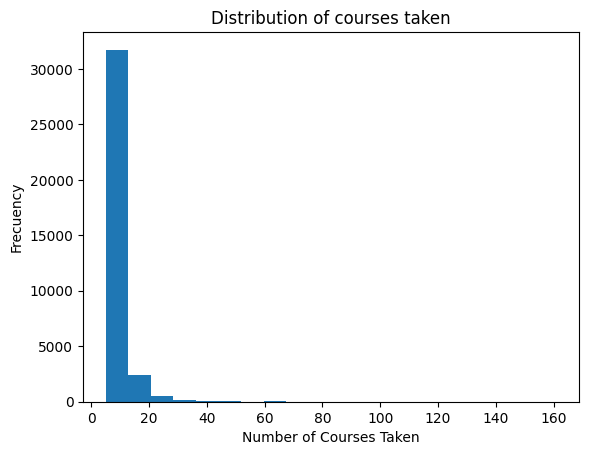

In [12]:
plt.hist(user_df['num_course_taken'], bins=20)
plt.xlabel('Number of Courses Taken')
plt.ylabel('Frecuency')
plt.title('Distribution of courses taken')
plt.show()

In [50]:
print(user_std)

3.020514472228401


In [55]:
all_courses = [movie for movies in user_df['course_order'] for movie in movies]

In [61]:
course_counts = pd.Series(all_courses).value_counts().reset_index()
course_counts.columns = ['course_id', 'user_count']
print(course_counts)

                                      course_id  user_count
0             C_course-v1:TsinghuaX+30240184+sp       32914
1    C_course-v1:TsinghuaX+00740043X_2015_T2+sp       31491
2            C_course-v1:TsinghuaX+30640014X+sp       30177
3                   C_course-v1:MITx+6_00_1x+sp       18473
4            C_course-v1:TsinghuaX+30240243X+sp       17265
..                                          ...         ...
693               C_course-v1:gmc+30102+2018_T2           1
694         C_course-v1:BNU+CHE21128011+2019_T1           1
695             C_course-v1:CIE+JD_2017+2019_T1           1
696         C_course-v1:HNU+20180424001+2018_T1           1
697        C_course-v1:XJTU+2018122507X+2018_T2           1

[698 rows x 2 columns]


In [95]:
mean_course = course_counts['user_count'].mean()
std_course = course_counts['user_count'].std()
min_course = course_counts['user_count'].min()
max_course = course_counts['user_count'].max()
median_course = course_counts['user_count'].median()
mode_course = course_counts['user_count'].mode().values[0]


In [96]:
print("Promedio: " + str(mean_course))
print("Std: " + str(std_course))
print("Min: " + str(min_course))
print("Max: " + str(max_course))
print("Mediana: " + str(median_course))
print("Moda: " + str(mode_course))

Promedio: 978.1561604584527
Std: 2742.658014965899
Min: 1
Max: 32914
Mediana: 191.0
Moda: 6


In [66]:
usuarios_por_numero_de_peliculas = user_df['num_course_taken'].value_counts().reset_index()
usuarios_por_numero_de_peliculas.columns = ['course_num', 'num users']
usuarios_por_numero_de_peliculas = usuarios_por_numero_de_peliculas.sort_values(by='course_num')

print(usuarios_por_numero_de_peliculas)

    course_num  num users
0            2     103776
1            3      40220
2            4      20286
3            5      11550
4            6       7079
..         ...        ...
70         122          1
69         123          1
74         149          1
79         154          1
82         161          1

[84 rows x 2 columns]


### Relacion Curso-Paper

In [109]:
# course_concept_df = pd.read_json("../data/MOOCCube/relations/course-concept.json",lines=True)
with open("../data/MOOCCube/relations/concept-paper.json", "r",encoding="utf-8") as file:
    paper_ids = []
    concept_ids = []
    for line in file:
        line = line.split("\t")
        paper_ids.append(line[1].replace("\n",""))
        concept_ids.append(line[0].replace("\n",""))
        

In [110]:
paper_concept_relation_df = pd.DataFrame({"id_paper":paper_ids,"id_concept":concept_ids})

In [111]:
paper_concept_relation_df.sample(5)

,id_paper,id_concept
677647,P_56d8b9f7dabfae2eee270c17,K_嵌入型洪积扇_地理学
269368,P_53e9bc54b7602d97048cec99,K_阻燃结构_电气工程
559771,P_53e9a19ab7602d9702a8c078,K_焊接检验_机械工程
469484,P_53e9ba28b7602d9704630f13,K_节径比_电气工程
840635,P_53e9a7e3b7602d9703122f3f,K_分形测度_物理学


In [118]:
mean = paper_concept_relation_df.groupby('id_paper')['id_concept'].count().mean()
std = paper_concept_relation_df.groupby('id_paper')['id_concept'].count().std()
min_v = paper_concept_relation_df.groupby('id_paper')['id_concept'].count().min()
max_v = paper_concept_relation_df.groupby('id_paper')['id_concept'].count().max()
median = paper_concept_relation_df.groupby('id_paper')['id_concept'].count().median()
mode = paper_concept_relation_df.groupby('id_paper')['id_concept'].count().mode().values[0]

In [119]:
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 1.4692949293164066
Std: 5.428915694816066
Min: 1
Max: 807
Mediana: 1.0
Moda: 1


In [120]:
mean = paper_concept_relation_df.groupby('id_concept')['id_paper'].count().mean()
std = paper_concept_relation_df.groupby('id_concept')['id_paper'].count().std()
min_v = paper_concept_relation_df.groupby('id_concept')['id_paper'].count().min()
max_v = paper_concept_relation_df.groupby('id_concept')['id_paper'].count().max()
median = paper_concept_relation_df.groupby('id_concept')['id_paper'].count().median()
mode = paper_concept_relation_df.groupby('id_concept')['id_paper'].count().mode().values[0]

In [121]:
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 9.976248264565168
Std: 0.4115523306370083
Min: 1
Max: 20
Mediana: 10.0
Moda: 10


### Relación curso concepto

In [114]:
with open("../data/MOOCCube/relations/course-concept.json", "r",encoding="utf-8") as file:
    courses_ids = []
    concept_ids = []
    for line in file:
        line = line.split("\t")
        courses_ids.append(line[0])
        concept_ids.append(line[1].replace("\n",""))

In [115]:
course_concept_relation_df = pd.DataFrame({"id_course":courses_ids,"id_concept":concept_ids})

In [116]:
mean = course_concept_relation_df.groupby('id_course')['id_concept'].count().mean()
std = course_concept_relation_df.groupby('id_course')['id_concept'].count().std()
min_v = course_concept_relation_df.groupby('id_course')['id_concept'].count().min()
max_v = course_concept_relation_df.groupby('id_course')['id_concept'].count().max()
median = course_concept_relation_df.groupby('id_course')['id_concept'].count().median()
mode = course_concept_relation_df.groupby('id_course')['id_concept'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 245.6090775988287
Std: 121.38267825448973
Min: 6
Max: 899
Mediana: 234.0
Moda: 284


In [117]:
mean = course_concept_relation_df.groupby('id_concept')['id_course'].count().mean()
std = course_concept_relation_df.groupby('id_concept')['id_course'].count().std()
min_v = course_concept_relation_df.groupby('id_concept')['id_course'].count().min()
max_v = course_concept_relation_df.groupby('id_concept')['id_course'].count().max()
median = course_concept_relation_df.groupby('id_concept')['id_course'].count().median()
mode = course_concept_relation_df.groupby('id_concept')['id_course'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 6.6565215666045
Std: 15.32440326226328
Min: 1
Max: 303
Mediana: 2.0
Moda: 1


### Relación Curso Video

In [131]:
with open("../data/MOOCCube/relations/course-video.json", "r",encoding="utf-8") as file:
    course_ids = []
    video_ids = []
    for line in file:
        line = line.split("\t")
        course_ids.append(line[0].replace("\n",""))
        video_ids.append(line[1].replace("\n",""))

In [132]:
course_video_relation_df = pd.DataFrame({"id_course":course_ids,"id_video":video_ids})
course_video_relation_df.sample(5)

,id_course,id_video
9673,C_course-v1:TsinghuaX+2018031601X+2019_T1,V_622133719dd74caca32bf73261111350
22974,C_course-v1:TsinghuaX+10610224X+2019_T1,V_d767a143fd6e4e11b7389129925d3e93
34152,C_course-v1:TsinghuaX+20220332X+2019_T1,V_f59f0ed371944c5aa40935f40db882cf
3063,C_course-v1:TsinghuaX+10610193X+2019_T1,V_b6d3c29109264fe3b14104f2de990841
23144,C_course-v1:TsinghuaX+10450034_1X_2X+2019_T1,V_877895d1c13b43ef8dcfa2307c873291


In [135]:
mean = course_video_relation_df.groupby('id_course')['id_video'].count().mean()
std = course_video_relation_df.groupby('id_course')['id_video'].count().std()
min_v = course_video_relation_df.groupby('id_course')['id_video'].count().min()
max_v = course_video_relation_df.groupby('id_course')['id_video'].count().max()
median = course_video_relation_df.groupby('id_course')['id_video'].count().median()
mode = course_video_relation_df.groupby('id_course')['id_video'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 66.26345609065156
Std: 46.72288908849797
Min: 5
Max: 510
Mediana: 54.0
Moda: 32


In [136]:
mean = course_video_relation_df.groupby('id_video')['id_course'].count().mean()
std = course_video_relation_df.groupby('id_video')['id_course'].count().std()
min_v = course_video_relation_df.groupby('id_video')['id_course'].count().min()
max_v = course_video_relation_df.groupby('id_video')['id_course'].count().max()
median = course_video_relation_df.groupby('id_video')['id_course'].count().median()
mode = course_video_relation_df.groupby('id_video')['id_course'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 1.2252691129095623
Std: 0.4349653731593946
Min: 1
Max: 4
Mediana: 1.0
Moda: 1


### Relation School Course

In [143]:
with open("../data/MOOCCube/relations/school-course.json", "r",encoding="utf-8") as file:
    course_ids = []
    school_ids = []
    for line in file:
        line = line.split("\t")
        course_ids.append(line[1].replace("\n",""))
        school_ids.append(line[0].replace("\n",""))

In [144]:
school_course_relation_df = pd.DataFrame({"id_course":course_ids,"id_school":school_ids})
school_course_relation_df.sample(5)

,id_course,id_school
129,C_course-v1:McGillX+Chem181x+sp,S_McGillX
510,C_course-v1:TsinghuaX+00612642X+sp,S_TsinghuaX
237,C_course-v1:WellesleyX+ANTH207x+sp,S_WellesleyX
229,C_course-v1:LZU+2018122505X+2018_T2,S_LZU
412,C_course-v1:TsinghuaX+AP000008X+2019_T1,S_TsinghuaX


In [148]:
mean = school_course_relation_df.groupby('id_course')['id_school'].count().mean()
std = school_course_relation_df.groupby('id_course')['id_school'].count().std()
min_v = school_course_relation_df.groupby('id_course')['id_school'].count().min()
max_v = school_course_relation_df.groupby('id_course')['id_school'].count().max()
median = school_course_relation_df.groupby('id_course')['id_school'].count().median()
mode = school_course_relation_df.groupby('id_course')['id_school'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 1.0
Std: 0.0
Min: 1
Max: 1
Mediana: 1.0
Moda: 1


In [149]:
mean = course_video_relation_df.groupby('id_school')['id_course'].count().mean()
std = course_video_relation_df.groupby('id_school')['id_course'].count().std()
min_v = course_video_relation_df.groupby('id_school')['id_course'].count().min()
max_v = course_video_relation_df.groupby('id_school')['id_course'].count().max()
median = course_video_relation_df.groupby('id_school')['id_course'].count().median()
mode = course_video_relation_df.groupby('id_school')['id_course'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 4.66887417218543
Std: 21.772680696782878
Min: 1
Max: 267
Mediana: 2.0
Moda: 1


### Relation School Teacher

In [150]:
with open("../data/MOOCCube/relations/school-teacher.json", "r",encoding="utf-8") as file:
    teacher_ids = []
    school_ids = []
    for line in file:
        line = line.split("\t")
        teacher_ids.append(line[1].replace("\n",""))
        school_ids.append(line[0].replace("\n",""))

In [151]:
school_teacher_relation_df = pd.DataFrame({"id_teacher":teacher_ids,"id_school":school_ids})
school_teacher_relation_df.sample(5)

,id_teacher,id_school
2004,T_黄至辉,S_FJTCM
1653,T_沈拓,S_TsinghuaX
139,T_李勇刚,S_TCIS
339,T_熊炜,S_ZNDX
1020,T_刘震,S_教育部在线教育研究中心


In [153]:
mean = school_teacher_relation_df.groupby('id_teacher')['id_school'].count().mean()
std = school_teacher_relation_df.groupby('id_teacher')['id_school'].count().std()
min_v = school_teacher_relation_df.groupby('id_teacher')['id_school'].count().min()
max_v = school_teacher_relation_df.groupby('id_teacher')['id_school'].count().max()
median = school_teacher_relation_df.groupby('id_teacher')['id_school'].count().median()
mode = school_teacher_relation_df.groupby('id_teacher')['id_school'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 1.2255466052934407
Std: 0.6776239987370188
Min: 1
Max: 10
Mediana: 1.0
Moda: 1


In [156]:
mean = school_teacher_relation_df.groupby('id_school')['id_teacher'].count().mean()
std = school_teacher_relation_df.groupby('id_school')['id_teacher'].count().std()
min_v = school_teacher_relation_df.groupby('id_school')['id_teacher'].count().min()
max_v = school_teacher_relation_df.groupby('id_school')['id_teacher'].count().max()
median = school_teacher_relation_df.groupby('id_school')['id_teacher'].count().median()
mode = school_teacher_relation_df.groupby('id_school')['id_teacher'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 10.390243902439025
Std: 34.69748680562463
Min: 1
Max: 476
Mediana: 4.0
Moda: 1


### Relation Teacher Course

In [159]:
with open("../data/MOOCCube/relations/teacher-course.json", "r",encoding="utf-8") as file:
    teacher_ids = []
    course_ids = []
    for line in file:
        line = line.split("\t")
        teacher_ids.append(line[0].replace("\n",""))
        course_ids.append(line[1].replace("\n",""))

In [160]:
course_teacher_relation_df = pd.DataFrame({"id_teacher":teacher_ids,"id_course":course_ids})
course_teacher_relation_df.sample(5)

,id_teacher,id_course
139,T_陈艺,C_course-v1:gmc+3060511+2018_T2
236,T_韩国庆,C_course-v1:CUPB+100203E003+2019_T1
580,T_Maggie Sokolik,C_course-v1:UC_BerkeleyX+ColWri2_1x_2015_T1+20...
2053,T_梁恒,C_course-v1:TsinghuaX+AP000014X+2019_T1
1385,T_王元丰,C_course-v1:BJTU+2017072501X+sp


In [162]:
mean = course_teacher_relation_df.groupby('id_teacher')['id_course'].count().mean()
std = course_teacher_relation_df.groupby('id_teacher')['id_course'].count().std()
min_v = course_teacher_relation_df.groupby('id_teacher')['id_course'].count().min()
max_v = course_teacher_relation_df.groupby('id_teacher')['id_course'].count().max()
median = course_teacher_relation_df.groupby('id_teacher')['id_course'].count().median()
mode = course_teacher_relation_df.groupby('id_teacher')['id_course'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 1.3515535097813578
Std: 0.719095897179233
Min: 1
Max: 7
Mediana: 1.0
Moda: 1


In [163]:
mean = course_teacher_relation_df.groupby('id_course')['id_teacher'].count().mean()
std = course_teacher_relation_df.groupby('id_course')['id_teacher'].count().std()
min_v = course_teacher_relation_df.groupby('id_course')['id_teacher'].count().min()
max_v = course_teacher_relation_df.groupby('id_course')['id_teacher'].count().max()
median = course_teacher_relation_df.groupby('id_course')['id_teacher'].count().median()
mode = course_teacher_relation_df.groupby('id_course')['id_teacher'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 3.370157819225251
Std: 3.6914975473002785
Min: 1
Max: 36
Mediana: 2.0
Moda: 1


### Relaction User Video

In [164]:
with open("../data/MOOCCube/relations/user-video.json", "r",encoding="utf-8") as file:
    user_ids = []
    video_ids = []
    for line in file:
        line = line.split("\t")
        user_ids.append(line[0].replace("\n",""))
        video_ids.append(line[1].replace("\n",""))

In [165]:
user_video_relation_df = pd.DataFrame({"id_user":user_ids,"id_video":video_ids})
user_video_relation_df.sample(5)

,id_user,id_video
3646556,U_6885637,V_6d4456ceb15a4fb790ba7562d2f8cbee
8895157,U_11752918,V_1d7a2f3294de4393bc41fecfa3c95949
7165563,U_4442664,V_3b46970fa1d74d47af05b5e5bae509e9
985145,U_9507024,V_ee338aace975455a95e681ac59b21e8f
176709,U_1096186,V_2f61f279587e4c6f8b19732658415b53


In [166]:
mean = user_video_relation_df.groupby('id_user')['id_video'].count().mean()
std = user_video_relation_df.groupby('id_user')['id_video'].count().std()
min_v = user_video_relation_df.groupby('id_user')['id_video'].count().min()
max_v = user_video_relation_df.groupby('id_user')['id_video'].count().max()
median = user_video_relation_df.groupby('id_user')['id_video'].count().median()
mode = user_video_relation_df.groupby('id_user')['id_video'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 44.936189438702
Std: 75.09035170249358
Min: 2
Max: 3545
Mediana: 19.0
Moda: 4


In [167]:
mean = user_video_relation_df.groupby('id_video')['id_user'].count().mean()
std = user_video_relation_df.groupby('id_video')['id_user'].count().std()
min_v = user_video_relation_df.groupby('id_video')['id_user'].count().min()
max_v = user_video_relation_df.groupby('id_video')['id_user'].count().max()
median = user_video_relation_df.groupby('id_video')['id_user'].count().median()
mode = user_video_relation_df.groupby('id_video')['id_user'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 248.32835820895522
Std: 784.6445123972571
Min: 1
Max: 24025
Mediana: 35.5
Moda: 1


### Relation video concept

In [168]:
with open("../data/MOOCCube/relations/video-concept.json", "r",encoding="utf-8") as file:
    concept_ids = []
    video_ids = []
    for line in file:
        line = line.split("\t")
        concept_ids.append(line[0].replace("\n",""))
        video_ids.append(line[1].replace("\n",""))

In [169]:
concept_video_relation_df = pd.DataFrame({"id_video":video_ids,"id_concept":concept_ids})
concept_video_relation_df.sample(5)

,id_video,id_concept
22546,K_骨架_机械工程,V_8ad0b338a67543ea8c3509a7719fc59f
268804,K_输出流_计算机科学技术,V_9029e4f86207494d9cf33bd85dbbe7c9
125848,K_温度场_机械工程,V_5f0de1e191334ea4aee3d43fee6c7a14
16164,K_晋升_管理科学技术,V_18643a5ef13c4f39971c0ea5a91a37b0
87429,K_碰撞力_机械工程,V_081b9e0c85af4e06a861561b8817d521


In [170]:
mean = concept_video_relation_df.groupby('id_concept')['id_video'].count().mean()
std = concept_video_relation_df.groupby('id_concept')['id_video'].count().std()
min_v = concept_video_relation_df.groupby('id_concept')['id_video'].count().min()
max_v = concept_video_relation_df.groupby('id_concept')['id_video'].count().max()
median = concept_video_relation_df.groupby('id_concept')['id_video'].count().median()
mode = concept_video_relation_df.groupby('id_concept')['id_video'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 9.706865689754558
Std: 1.2040049508011406
Min: 1
Max: 10
Mediana: 10.0
Moda: 10


In [171]:
mean = concept_video_relation_df.groupby('id_video')['id_concept'].count().mean()
std = concept_video_relation_df.groupby('id_video')['id_concept'].count().std()
min_v = concept_video_relation_df.groupby('id_video')['id_concept'].count().min()
max_v = concept_video_relation_df.groupby('id_video')['id_concept'].count().max()
median = concept_video_relation_df.groupby('id_video')['id_concept'].count().median()
mode = concept_video_relation_df.groupby('id_video')['id_concept'].count().mode().values[0]
print("Promedio: " + str(mean))
print("Std: " + str(std))
print("Min: " + str(min_v))
print("Max: " + str(max_v))
print("Mediana: " + str(median))
print("Moda: " + str(mode))

Promedio: 12.6958454029602
Std: 34.08974596503853
Min: 1
Max: 770
Mediana: 3.0
Moda: 1
